 #  <div style="text-align: center">  Democrats vs Republicans : Tweets Analysis </div> 
####  <div style="text-align: center">- Buzzwords for each party</div> 
####  <div style="text-align: center">- Sentiment Analysis</div> 
####  <div style="text-align: center">- Predict if the tweet author is Democrat or Republican</div> 

<img src='https://cdn.vox-cdn.com/thumbor/aIIW9oDTfwwAfQlXxtCpqBiOoq0=/0x0:1600x1024/1120x0/filters:focal(0x0:1600x1024):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19485273/Mn5Zcw2fIgOmx2Xg35CGM33_QrqLZw22VE6IYl4egLnDwJwqgjNY21ZdzJObQ7dUPk8BT8qiMt_FuIcS068wqJ3JYObIDEBZ4qOdfo5OiQR7SNItKjuK6Y4K69byoS4529jMFyaa.png'>

### <div style="text-align:center"> Kernel By: <b> Kamal Chouhbi</b></div>

 <a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Load packages](#2)
    1. [import](#21)
    1. [Setup](#22)
    1. [Version](#23)
1. [EDA](#3)
    1. [Extracting most used hashtags](#31)
1. [Data Cleaning](#4)
    1. [Frequency of Usage of Words](#41)
1. [Dispersion Plots](#5)
    1. [Democrat Tweets Plot](#51)
    1. [Republican Tweets Plot](#52)
1. [Sentiment Analysis](#6)
1. [Tweets Classification](#7)
    1. [TFIDVectorizer or CountVectorizer](#71)
    1. [RandomForestClassifier](#72)
    1. [LogisticRegression](#73)
    1. [MultinomialNB](#74)
    1. [DecisionTreeClassifier](#75)
    1. [AdaBoostClassifier](#76)
    1. [Results](#77)    
1. [Simple neural network classification](#8)
1. [Conclusion](#9)

 <a id="1"></a> <br>
# 1- Introduction

**Twitter** is a modern public area where many voices discuss, debate and share their views. Recently, politicians turned to social networks for real-time information and reactions to the day’s events. It has become a major outlet for politicians to connect directly with supporters, hash out ideas, and air complaints about opponents.


*TweetCongress.org*, a directory of members of Congress on Twitter, lists **101 Republicans** on the site and just **57 Democrats**. Each party is mostly held up by a few **Twitter** superstars (like **Democratic Sen. Claire McCaskill** and **Republican Sen. John McCain**), but congressional **Republicans** overall have more followers and tweet more often.

This is a quick exploration of tweets from **Democrat** and **Republican** lawmakers in the **US**. The main purpose of this initial analysis will be to visualize words used by the different parties. This will be achieved through cleaning the tweets, parsing them into vectors of words, removing common stopwords, aggregating words by count, and plotting the most frequent results using barplots.

Then, I will try to categorize the tweets into organized groups or parties using different text classifiers, in addition to **Sentiment Analysis** for understanding if a given tweet is talking positively or negatively about a given subject.

 <a id="2"></a> <br>
 # 2- Load packages
  <a id="21"></a> <br>
## 2-A Import

In [1]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode,iplot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize.casual import TweetTokenizer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from nltk.probability import FreqDist
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import chart_studio.plotly as py
from textblob import TextBlob
from nltk.text import Text  
from pandas import Series
from plotly import tools
import networkx as nx
from PIL import Image
import seaborn as sns
import nltk, string
import pandas as pd
import numpy as np
import nltk as nlp
import warnings
import sys
import os
import re

 <a id="22"></a> <br>
##  2-B Setup

In [2]:
%matplotlib inline
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

 <a id="23"></a> <br>
## 2-C Version

In [3]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 0.24.2
numpy: 1.16.2
Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


 <a id="3"></a> <br>
# 3. EDA 

This dataset contains the tweet ids of 86,460 tweets related to the 2018 U.S. Congressional Election. They were collected between January 22, 2018 and January 3, 2019 from the Twitter API using Social Feed Manager. See each collection's README for dates of collection, accounts, and hashtags used in queries.

In [4]:
df = pd.read_csv("Data/ExtractedTweets.csv")
df.dropna(axis = 0, inplace = True)

- Democrats = 1
- Respublicans = 0

In [5]:
df["Party_log"] = [1 if each == "Democrat" else 0 for each in df.Party]
print(df.shape)
df.head()

(86460, 4)


,Party,Handle,Tweet,Party_log
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",1
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,1
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,1
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,1
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,1


And the first tweet is as follows:

In [6]:
df.Tweet[0]

'Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L'

In [7]:
df.Party.value_counts()

Republican    44392
Democrat      42068
Name: Party, dtype: int64

We can say that we have roughly similar proportions of Democrats & Republicans in the training dataset.

 <a id="31"></a> <br>
### 3.1 Extracting most used hashtags for each party : Demcoratic & Republican

In [8]:
def extract_hash_tags(twt):
        hashtag = re.findall('(\#[A-Za-z_]+)', twt)
        if hashtag:
            return hashtag
        else:
             return ""

In [9]:
df_h = df.copy()
df_h['top_hashtags'] = df_h['Tweet'].apply(lambda x: extract_hash_tags(x))

hashtags_list_rep = []
hashtags_list_dem = []

for n in range(len(df_h['top_hashtags'])):
    if df_h['Party_log'][n] == 0:
        hashtags_list_rep += df_h['top_hashtags'][n]
    elif df_h['Party_log'][n] == 1:
        hashtags_list_dem += df_h['top_hashtags'][n]

Text(0.5, 1.0, "Democrats' 6 most used hashtags")

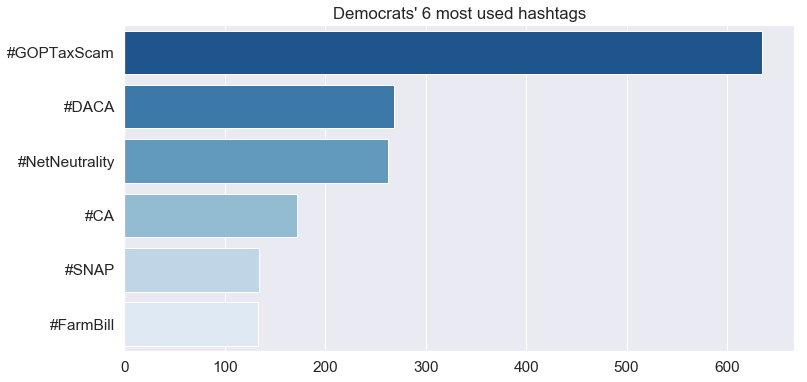

In [12]:
Dem_tophashtags = Series(hashtags_list_dem).value_counts().head(n=6)
sns.set_style("white")
sns.set(font_scale=1.4)
plt.figure(figsize=(12,6))
sns.barplot(x=Dem_tophashtags, y=Dem_tophashtags.index,  orient='h', palette="Blues_r").set_title("Democrats' 6 most used hashtags")

Text(0.5, 1.0, "Republicans' 6 most used hashtags")

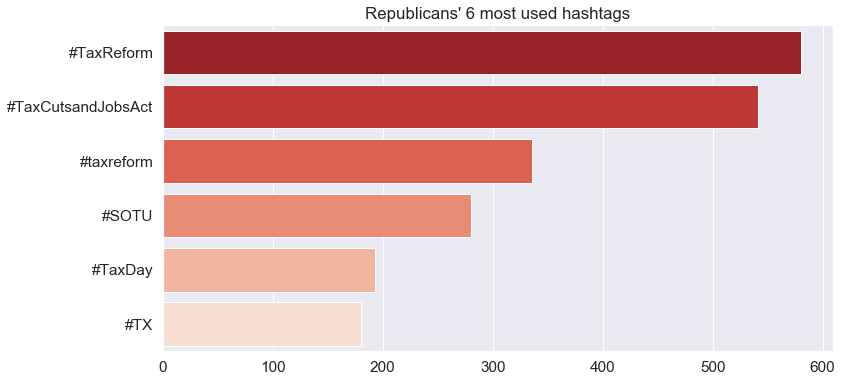

In [14]:
Rep_tophashtags = Series(hashtags_list_rep).value_counts().head(n=6)
sns.set_style("white")
sns.set(font_scale=1.4)
plt.figure(figsize=(12, 6))
sns.barplot(x=Rep_tophashtags, y=Rep_tophashtags.index, orient='h', palette="Reds_r").set_title("Republicans' 6 most used hashtags")

This is getting interesting. We can now see the Republican party (in red) touting their policies (e.g., taxcutsandjobsact). For those less familiar with US politics, the Republican Party controls the presidency and both chambers of Congress, and are therefore able to implement their agenda relatively unfettered. On the other side of the aisle, however, we see some clear bitterness (e.g., goptaxscam).

 <a id="4"></a> <br>
# 4. Data Cleaning

Before starting the analysis, we should remove like @, rt, html, # etc. objects.

In [12]:
len(set(stopwords.words("english"))) , len(set(STOPWORDS)) , len(set(STOP_WORDS))

(179, 192, 326)

In [13]:
print(set(stopwords.words("english")))

{'ma', 'yourselves', 'whom', 'both', 'during', 'our', 'yourself', 'ain', "you're", 'below', 'will', 'had', 'some', 'this', 'few', 'its', 'are', 'and', 'at', 'an', "doesn't", "hasn't", 'which', 'isn', 'own', 'herself', 'as', 'yours', 'that', 'a', "haven't", 'such', "needn't", 'them', 'ourselves', 'weren', 'when', 'if', "don't", 'being', 'did', 's', 'very', "shouldn't", 'won', 'him', 'those', 'now', 'didn', "should've", "she's", 'here', 'itself', 'doing', 'more', 'before', 'same', 'should', 'shan', 'he', 'or', 'll', "isn't", 'after', 'down', 'again', 'it', 'so', 're', 'was', 'only', 'your', 'himself', 'i', 'with', 'why', 'theirs', 've', 'you', 'y', 'd', "aren't", 'to', 'o', 'because', 'into', 'of', 'other', 'were', 'is', 'needn', "you've", 'once', 'has', 'do', 'shouldn', 'am', "mustn't", 'how', 'on', 'nor', 'not', 'hadn', 'further', "couldn't", 'for', 'each', "weren't", "didn't", 'we', 'ours', 'me', 'my', 'wasn', 'have', 'under', 'mightn', 'mustn', 'm', 'his', "wouldn't", 'than', "it's",

In [23]:
print(set(STOPWORDS))

{'him', 'which', 'when', 'could', "wasn't", 'all', 'by', "doesn't", 'own', 'am', "hasn't", 'there', 'cannot', 'his', 'her', "wouldn't", 'was', 'i', 'on', 'himself', 'itself', 'through', 'again', 'our', 'have', 'after', 'ours', 'your', 'http', "they're", 'too', 'any', "isn't", 'you', 'above', "who's", "you're", "why's", 'like', 'both', 'be', 'also', 'out', 'do', 'why', 'r', 'how', 'therefore', 'up', 'has', 'only', "hadn't", 'hence', 'other', 'over', 'yours', 'being', 'had', "you'll", 'what', 'shall', 'here', 'just', 'with', 'in', 'who', 'were', 'so', 'for', 'its', 'www', "shan't", 'but', 'off', "i'd", 'between', "you'd", 'into', 'same', 'few', "didn't", 'else', 'such', 'theirs', "couldn't", "won't", 'did', 'my', 'more', "how's", 'she', 'this', 'having', 'been', 'an', 'to', 'get', 'than', "that's", 'herself', 'doing', "weren't", 'they', "she'll", 'or', "they'll", 'whom', "where's", "don't", "can't", 'however', 'and', 'ourselves', 'k', 'me', "there's", 'where', 'can', 'ever', "it's", 'it'

In [24]:
print(set(STOP_WORDS))

{'him', 'done', 'name', 'give', 'when', '’s', "n't", '‘re', 'by', 'per', 'everyone', 'there', 'his', 'ca', 'take', 'was', 'except', 'itself', 'may', 'again', 'through', 'next', 'namely', 'might', 'moreover', 'various', 'ours', 'seems', "'ll", 'many', 'above', 'whence', 'five', 'both', 'almost', "'m", 'also', '‘d', 'do', 'made', 'why', 'fifteen', 'hereby', 'perhaps', 'third', 'has', 'other', 'hence', 'yours', '’ll', 'unless', 'with', 'just', 'less', 'in', 'whose', 'enough', 'so', 'bottom', 'its', 'but', 'off', 'someone', 'into', 'thence', 'few', 'become', 'eleven', 'even', 'onto', 'did', 'nevertheless', 'she', 'rather', 'thus', 'every', 'herself', '’re', 'herein', 'anyhow', 'they', 'or', 'whether', 'four', 'however', 'across', 'and', 'whereas', 'me', 'eight', 'where', 'ever', 'indeed', 'wherever', 'move', 'meanwhile', 'anything', 'first', 'of', 'would', 'somewhere', 'most', 'are', 'others', 'thereby', 'upon', 'us', 'whereupon', 'some', 'another', 'not', 'below', 'beforehand', 'neither',

The choice of the stopwords can be critical sometimes. I thought maybe it's better to choose the STOPWORDS from the "wordcloud" library because they contain an average list of all of them.

In [14]:
#we created 2 different class as democrat and republican
democrat=df[df.Party=="Democrat"]
republican=df[df.Party=="Republican"]

In [63]:
#add some unnecessary words to STOPWORDS list
STOPWORDS.add("rt")
STOPWORDS.add("s")
STOPWORDS.add("u")
STOPWORDS.add("amp")
STOPWORDS.add("th")
STOPWORDS.add("will")
STOPWORDS.add("t")
STOPWORDS.add("m")

In [64]:
#Cleaning democrat party tweets 
democrat_list=[]
for d in democrat.Tweet:
    d=re.sub(r'http\S+', '', d) #remove links
    d=re.sub("[^a-zA-Z]", " ", d) #remove all characters except letters
    d=d.lower() #convert all words to lowercase
    d=nltk.word_tokenize(d) #split sentences into word
    d=[word for word in d if not word in STOPWORDS] #remove the stopwords
    lemma=nlp.WordNetLemmatizer() 
    d=[lemma.lemmatize(word) for word in d] #identify the correct form of the word in the dictionary
    d=" ".join(d)
    democrat_list.append(d) #append words to list

In [65]:
#same process as before
republican_list=[]
for r in republican.Tweet:
    r=re.sub(r'http\S+', '', r)
    r=re.sub("[^a-zA-Z]", " ", r)
    r=r.lower()
    r=nltk.word_tokenize(r)
    r=[word for word in r if not word in STOPWORDS]
    lemma=nlp.WordNetLemmatizer()
    r=[lemma.lemmatize(word) for word in r]
    r=" ".join(r)
    republican_list.append(r)

Let's have a look at our lists :

In [18]:
#first 5 tweets in the list of the Democrats
democrat_list[0:5]

['today senate dems vote savetheinternet proud support similar netneutrality legislation house',
 'winterhavensun winter haven resident alta vista teacher one several recognized repdarrensoto national teacher apprecia',
 'nbclatino repdarrensoto noted hurricane maria left approximately billion damage congress allocated',
 'nalcabpolicy meeting repdarrensoto thanks taking time meet latinoleader ed marucci guzman nalcabpolicy',
 'vegalteno hurricane season start june st puerto rico readiness well pwr puertorico repdarrensoto espaillatny']

In [19]:
#first 5 tweets in the list of the Republicans
republican_list[0:5]

['wastefulwednesday today introduced bill eliminate global climate change initiative gc',
 'today honored heroic men woman law enforcement lost life line duty nati',
 'congressmanraja last week repralphnorman hosted briefing economic benefit solar energy production',
 'tegacaypd chief parker thankful receive recognition repralphnorman delivered mayor davidloneal national police',
 'visited sc highway patrol bring cupcake thank service honor']

However I would like to review these tweets word by word. So I split sentences into words and remove unnecessary punctuation characters:

In [66]:
democrat_tweets=str(democrat_list).split()
democrat_tweets=[word.replace("'","") for word in democrat_tweets ]
democrat_tweets=[word.replace("[", "") for word in democrat_tweets ]
democrat_tweets=[word.replace("]","") for word in democrat_tweets ]
democrat_tweets=[word.replace(",", "") for word in democrat_tweets ]

republican_tweets=str(republican_list).split()
republican_tweets=[word.replace("'","") for word in republican_tweets ]
republican_tweets=[word.replace("[", "") for word in republican_tweets ]
republican_tweets=[word.replace("]","") for word in republican_tweets ]
republican_tweets=[word.replace(",", "") for word in republican_tweets ]

Now lets check length of the two lists :

In [67]:
print("Democrat tweets word length:",len(democrat_tweets))
print("Republican tweets word length:",len(republican_tweets))

Democrat tweets word length: 446197
Republican tweets word length: 459826


There are **446197 words** in Democrat tweets and **459826 words** in Republican tweets.

 <a id="41"></a> <br>
###  4.1 Frequency of Usage of Words by Parties

In [68]:
#FreqDist records the number of times each words are used. 
fdist_democrat = FreqDist(democrat_tweets)
fdist_republican=FreqDist(republican_tweets)

In [36]:
print("Frequency of Words : Democrat")
fdist_democrat

Frequency of Words : Democrat


FreqDist({'today': 3850, 'trump': 2502, 'american': 2053, 'm': 1858, 'year': 1835, 'thank': 1777, 'family': 1694, 'great': 1676, 'student': 1660, 'day': 1571, ...})

For example, the word **"today"** (3850 times) is used most in the tweets sent by democrat people. Then we find **"trump"** (2502 times) and  **"american"** (2053 times).

In [37]:
print("Frequency of Words : Republican")
fdist_republican

Frequency of Words : Republican


FreqDist({'today': 4883, 'tax': 2885, 'great': 2876, 'house': 2382, 'bill': 2379, 'american': 2241, 'thank': 2118, 'year': 1961, 'day': 1887, 'act': 1820, ...})

If we look at the tweets of people who have a republican opinion, the word **"today"** (4883 times) is in the first place again, **"tax"** is in the second place and **"great"** in the third place.

In [69]:
Dem_freqw=Series(fdist_democrat).sort_values(ascending=False).head(15)
Rep_freqw=Series(fdist_republican).sort_values(ascending=False).head(15)

Text(0.5, 1.0, "Democrats' 15 most used words")

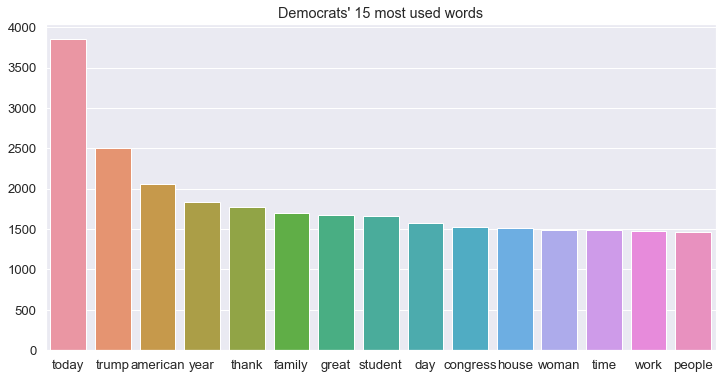

In [70]:
sns.set_style("white")
sns.set(font_scale=1.2)
plt.figure(figsize=(12,6))
sns.barplot(x=Dem_freqw.index, y=Dem_freqw).set_title("Democrats' 15 most used words")

Text(0.5, 1.0, "Republicans' 15 most used words")

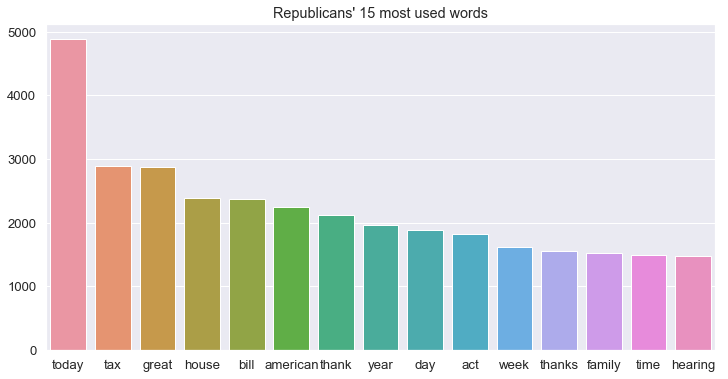

In [71]:
sns.set_style("white")
sns.set(font_scale=1.2)
plt.figure(figsize=(12,6))
sns.barplot(x=Rep_freqw.index, y=Rep_freqw).set_title("Republicans' 15 most used words")

I decide to merge the two lists and the word frequencies in one dataframe for better analysis :

In [73]:
de=pd.DataFrame(list(fdist_democrat.items()), columns = ["Word","FrequencyDemocrat"])
re=pd.DataFrame(list(fdist_republican.items()), columns = ["Word","FrequencyRepublican"])
WFreq=pd.merge(de,re,on='Word')
WFreq.head()

,Word,FrequencyDemocrat,FrequencyRepublican
0,today,3850,4883
1,senate,368,533
2,dems,136,61
3,vote,741,722
4,proud,1303,923


I also categorized the word frequencies into 5 categories : 

- If a word is used less than **50**, it is in the **Very Low** group.

- If it's used between **50** and **200** times, it is in the **Low** group.

- If it's used between **200** and **750** times, it is in the **Medium** group.

- If it's used between **750** and **1500** times, it is in the **High** group.

- If usage of a word is greater than **1500**, it is in the **Very High** group.

In [77]:
democratclass=[] 
for each in WFreq.FrequencyDemocrat:
    if each<50:
        democratclass.append("Very Low")
    elif 49<each<200:
        democratclass.append("Low")
    elif 199<each<750:
        democratclass.append("Medium")
    elif 749<each<1500:
        democratclass.append("High")
    else:
        democratclass.append("Very High")
        
WFreq["democratclass"]=democratclass

In [78]:
republicanclass=[] 
for each in WFreq.FrequencyRepublican:
    if each<50:
        republicanclass.append("Very Low")
    elif 49<each<200:
        republicanclass.append("Low")
    elif 199<each<750:
        republicanclass.append("Medium")
    elif 749<each<1500:
        republicanclass.append("High")
    else:
        republicanclass.append("Very High")
        
WFreq["republicanclass"]=republicanclass

In [79]:
WFreq.head()

,Word,FrequencyDemocrat,FrequencyRepublican,democratclass,republicanclass
0,today,3850,4883,Very High,Very High
1,senate,368,533,Medium,Medium
2,dems,136,61,Low,Low
3,vote,741,722,Medium,Medium
4,proud,1303,923,High,High


In [80]:
democratveryhigh=WFreq[WFreq.democratclass=="Very High"]
democrathigh=WFreq[WFreq.democratclass=="High"]
democratmedium=WFreq[WFreq.democratclass=="Medium"]
democratlow=WFreq[WFreq.democratclass=="Low"]
democratverylow=WFreq[WFreq.democratclass=="Very Low"]

In [81]:
vhvh=democratveryhigh[WFreq.republicanclass=="Very High"]
vhh=democratveryhigh[WFreq.republicanclass=="High"]
vhm=democratveryhigh[WFreq.republicanclass=="Medium"]
vhl=democratveryhigh[WFreq.republicanclass=="Low"]
vhvl=democratveryhigh[WFreq.republicanclass=="Very Low"]

hvh=democrathigh[WFreq.republicanclass=="Very High"]
hh=democrathigh[WFreq.republicanclass=="High"]
hm=democrathigh[WFreq.republicanclass=="Medium"]
hl=democrathigh[WFreq.republicanclass=="Low"]
hvl=democrathigh[WFreq.republicanclass=="Very Low"]

mvh=democratmedium[WFreq.republicanclass=="Very High"]
mh=democratmedium[WFreq.republicanclass=="High"]
mm=democratmedium[WFreq.republicanclass=="Medium"]
ml=democratmedium[WFreq.republicanclass=="Low"]
mvl=democratmedium[WFreq.republicanclass=="Very Low"]

lvh=democratlow[WFreq.republicanclass=="Very High"]
lh=democratlow[WFreq.republicanclass=="High"]
lm=democratlow[WFreq.republicanclass=="Medium"]
ll=democratlow[WFreq.republicanclass=="Low"]
lvl=democratlow[WFreq.republicanclass=="Very Low"]

vlvh=democratverylow[WFreq.republicanclass=="Very High"]
vlh=democratverylow[WFreq.republicanclass=="High"]
vlm=democratverylow[WFreq.republicanclass=="Medium"]
vll=democratverylow[WFreq.republicanclass=="Low"]
vlvl=democratverylow[WFreq.republicanclass=="Very Low"]

I created these categories to create a matrix

In [92]:
trace5 = go.Scatter(y=vhvh.FrequencyDemocrat, x=vhvh.FrequencyRepublican,text=vhvh.Word,mode='markers+text')
trace4 = go.Scatter(y=vhh.FrequencyDemocrat, x=vhh.FrequencyRepublican,text=vhh.Word,mode='markers+text')
trace3 = go.Scatter(y=vhm.FrequencyDemocrat, x=vhm.FrequencyRepublican,text=vhm.Word,mode='markers+text')
trace2 = go.Scatter(y=vhl.FrequencyDemocrat, x=vhl.FrequencyRepublican,text=vhl.Word,mode='markers+text')
trace1 = go.Scatter(y=vhvl.FrequencyDemocrat, x=vhvl.FrequencyRepublican,text=vhvl.Word,mode='markers+text')

trace10 = go.Scatter(y=hvh.FrequencyDemocrat, x=hvh.FrequencyRepublican,text=hvh.Word,mode='markers+text')
trace9 = go.Scatter(y=hh.FrequencyDemocrat, x=hh.FrequencyRepublican,text=hh.Word,mode='markers+text')
trace8 = go.Scatter(y=hm.FrequencyDemocrat, x=hm.FrequencyRepublican,text=hm.Word,mode='markers+text')
trace7 = go.Scatter(y=hl.FrequencyDemocrat, x=hl.FrequencyRepublican,text=hl.Word,mode='markers+text')
trace6 = go.Scatter(y=hvl.FrequencyDemocrat, x=hvl.FrequencyRepublican,text=hvl.Word,mode='markers+text')

trace15 = go.Scatter(y=mvh.FrequencyDemocrat, x=mvh.FrequencyRepublican,text=mvh.Word,mode='markers+text')
trace14 = go.Scatter(y=mh.FrequencyDemocrat, x=mh.FrequencyRepublican,text=mh.Word,mode='markers+text')
trace13 = go.Scatter(y=mm.FrequencyDemocrat, x=mm.FrequencyRepublican,text=mm.Word,mode='markers+text')
trace12 = go.Scatter(y=ml.FrequencyDemocrat, x=ml.FrequencyRepublican,text=ml.Word,mode='markers+text')
trace11 = go.Scatter(y=mvl.FrequencyDemocrat, x=mvl.FrequencyRepublican,text=mvl.Word,mode='markers+text')


trace20 = go.Scatter(y=lvh.FrequencyDemocrat, x=lvh.FrequencyRepublican,text=lvh.Word,mode='markers+text')
trace19 = go.Scatter(y=lh.FrequencyDemocrat, x=lh.FrequencyRepublican,text=lh.Word,mode='markers+text')
trace18 = go.Scatter(y=lm.FrequencyDemocrat, x=lm.FrequencyRepublican,text=lm.Word,mode='markers+text')
trace17 = go.Scatter(y=ll.FrequencyDemocrat, x=ll.FrequencyRepublican,text=ll.Word,mode='markers+text')
trace16 = go.Scatter(y=lvl.FrequencyDemocrat, x=lvl.FrequencyRepublican,text=lvl.Word,mode='markers+text')

trace25 = go.Scatter(y=vlvh.FrequencyDemocrat, x=vlvh.FrequencyRepublican,text=vlvh.Word,mode='markers+text')
trace24 = go.Scatter(y=vlh.FrequencyDemocrat, x=vlh.FrequencyRepublican,text=vlh.Word,mode='markers+text')
trace23 = go.Scatter(y=vlm.FrequencyDemocrat, x=vlm.FrequencyRepublican,text=vlm.Word,mode='markers+text')
trace22 = go.Scatter(y=vll.FrequencyDemocrat, x=vll.FrequencyRepublican,text=vll.Word,mode='markers+text')
trace21 = go.Scatter(y=vlvl.FrequencyDemocrat, x=vlvl.FrequencyRepublican,text=vlvl.Word,mode='markers+text')

fig = tools.make_subplots(rows=5, cols=5,shared_xaxes=True, shared_yaxes=True,print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.append_trace(trace5, 1, 5)
fig.append_trace(trace6, 2, 1)
fig.append_trace(trace7, 2, 2)
fig.append_trace(trace8, 2, 3)
fig.append_trace(trace9, 2, 4)
fig.append_trace(trace10, 2, 5)
fig.append_trace(trace11, 3, 1)
fig.append_trace(trace12, 3, 2)
fig.append_trace(trace13, 3, 3)
fig.append_trace(trace14, 3, 4)
fig.append_trace(trace15, 3, 5)
fig.append_trace(trace16, 4, 1)
fig.append_trace(trace17, 4, 2)
fig.append_trace(trace18, 4, 3)
fig.append_trace(trace19, 4, 4)
fig.append_trace(trace20, 4, 5)
fig.append_trace(trace21, 5, 1)
fig.append_trace(trace22, 5, 2)
fig.append_trace(trace23, 5, 3)
fig.append_trace(trace24, 5, 4)
fig.append_trace(trace25, 5, 5)


fig['layout']['xaxis5'].update(title='Very High')
fig['layout']['xaxis4'].update(title='High')
fig['layout']['xaxis3'].update(title='Medium')
fig['layout']['xaxis2'].update(title='Low')
fig['layout']['xaxis1'].update(title='Very Low')

fig['layout']['yaxis1'].update(title='Very High')
fig['layout']['yaxis2'].update(title='High')
fig['layout']['yaxis3'].update(title='Medium')
fig['layout']['yaxis4'].update(title='Low')
fig['layout']['yaxis5'].update(title='Very Low')



fig['layout'].update(height=1500, width=1500, title= "Words in Democrat and Republican Tweets",showlegend=False, titlefont=dict(size=30),
                    annotations=[dict(showarrow=False,text="Republican Tweets",x=0.5,y=-0.06,xref="paper",yref="paper",
                                      font=dict(size=30)),dict(showarrow=False, text='Democrat Tweets',
                                                               x=-0.06,y=0.5,xref="paper",yref="paper",textangle=270,
                                                               font=dict(size=30))],
                    plot_bgcolor="snow" ,paper_bgcolor='rgb(243, 243, 243)')
iplot(fig)

### --> Interpretation :

I tried to plot a matix in which the **'X'** axis refers to the word usage frequency of Republican tweets and **'Y'** axis refers to the same thing but related to the Democrats.

For example, the word **"taxreform"** is used by Republican **966** times, so it's placed in their high category. However, Democrats used that word only **12** times.

An other example is **"gun"** word. Its used **876** times in Democrat tweets and **117** times in Republican tweets.

Also there is no words, when Republicans used very highly and Democrats used at the medium, low or very low level. The same as for Democrats.

The words : **"today", "american", "great, "house", "year", "family", "day" and "thank"** are used very highly by both Democrats and Republicans.

 <a id="5"></a> <br>
# 5. Dispersion Plots

I have selected some words in the data set in order to produce a plot showing the distribution of the words through the text. These words are **"vote", "democracy", "freedom", "america", "american", "tax", "trump"** and **"clinton"**.

 <a id="51"></a> <br>
### 5.1 Democrat Tweets Plot

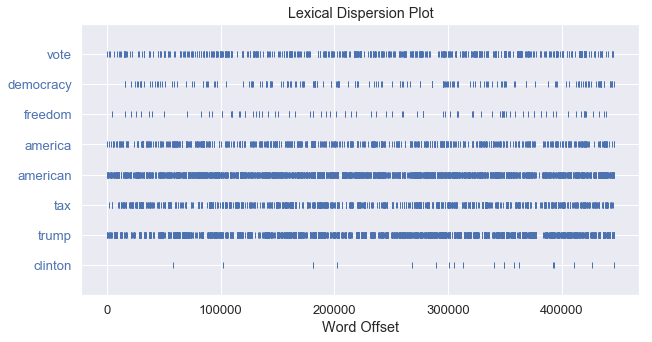

In [94]:
plt.subplots(figsize=(10,5))
democrat_tweet=Text(democrat_tweets)
democrat_tweet.dispersion_plot(["vote","democracy","freedom","america","american","tax","trump","clinton"])

 <a id="52"></a> <br>
### 5.2 Republican Tweets Plot

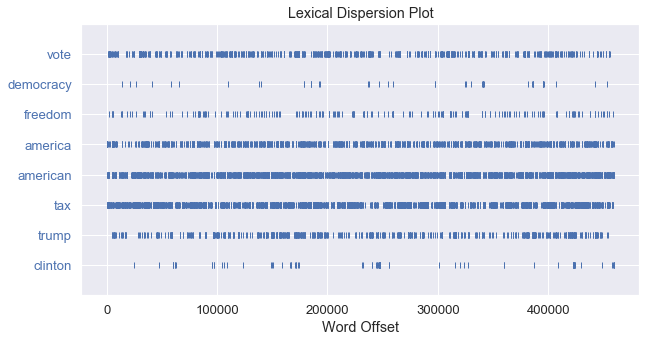

In [98]:
plt.subplots(figsize=(10,5))
republican_tweet=Text(republican_tweets)
republican_tweet.dispersion_plot(["vote","democracy","freedom","america","american","tax","trump","clinton"])

 <a id="6"></a> <br>
# 6. Sentiment Analysis

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

The **polarity** score is a float within the range [-1.0, 1.0]. And it represents emotions expressed in a sentence. **1** means positive statement and **-1** means a negative statement.

The **subjectivity** is a float within the range [0.0, 1.0] where **0.0** is very objective and **1.0** is very subjective. And it refers to personal opinion, emotion or judgment.

In [102]:
democratblob=TextBlob(str(democrat_tweets))
democratblob.sentiment

Sentiment(polarity=0.16538325109722254, subjectivity=0.4649093199451984)

In [103]:
republicanblob=TextBlob(str(republican_tweets))
republicanblob.sentiment

Sentiment(polarity=0.19837398561739605, subjectivity=0.4590746992419168)

 <a id="7"></a> <br>
# 7. Tweets Classification

In [116]:
train, test = train_test_split(df, test_size=0.3, train_size=0.7, random_state=14)
train.shape, test.shape

((60521, 4), (25938, 4))

In [12]:
train.head()

,Party,Handle,Tweet,Party_log
53928,Republican,HouseJudiciary,Safeguarding Trade Secrets in the United State...,0
50957,Republican,RepCurbelo,@DefendOurFuture Finding new ways to de-politi...,0
39092,Democrat,repjimcooper,"The final results are in, and 3,007 new high s...",1
60545,Republican,RepHalRogers,"RT @WhiteHouse: ""Last year, I also pledged tha...",0
75135,Republican,repdonyoung,"Happy birthday to my good friend, @SpeakerRyan...",0


In [33]:
st = LancasterStemmer()

def token(text):
    txt = nltk.word_tokenize(text.lower())
    return [st.stem(word) for word in txt]

 <a id="71"></a> <br>
### 7.1 TFIDVectorizer or CountVectorizer

Uncomment one of them and run it

In [35]:
cv = CountVectorizer(lowercase=True, 
                     tokenizer=token, stop_words=STOPWORDS,
                     analyzer=u'word', min_df=4)

# tv = TfidfVectorizer(stop_words = STOPWORDS,
#                      lowercase=True, binary = True)

In [37]:
vec_train = cv.fit_transform(train['Tweet'].tolist())
vec_test = cv.transform(test['Tweet'].tolist())

 <a id="72"></a> <br>
### 7.2 RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X = vec_train, y = train['Party_log'])

y_pred_rfc=rfc.predict(vec_test)
accuracy_score(y_pred_rfc, test['Party_log'])

0.7455085203176807

 <a id="73"></a> <br>
### 7.3 LogisticRegression

In [43]:
lr = LogisticRegression()
lr.fit(X = vec_train, y = train['Party_log'])

y_pred_lr=lr.predict(vec_test)
accuracy_score(y_pred_lr, test['Party_log'])

0.787531806615776

 <a id="74"></a> <br>
### 7.4 MultinomialNB

In [46]:
mnb = MultinomialNB(alpha = 0.1, fit_prior = True)
mnb.fit(vec_train.toarray(), train['Party_log'])

y_pred_mnb = mnb.predict(vec_test.toarray())
accuracy_score(y_pred_mnb, test['Party_log'])

0.7845246356696738

 <a id="75"></a> <br>
### 7.5 DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(vec_train.toarray(), train['Party_log'])

y_pred_dtc = dtc.predict(vec_test.toarray())
accuracy_score(y_pred_dtc, test['Party_log'])

0.6743388079265942

 <a id="76"></a> <br>
### 7.6 AdaBoostClassifier

In [48]:
ac = AdaBoostClassifier(n_estimators = 100)
ac.fit(vec_train.toarray(), train['Party_log'])

y_pred_ac = ac.predict(vec_test.toarray())
accuracy_score(y_pred_ac, test['Party_log'])

0.650628421620788

 <a id="77"></a> <br>
### 7.7 Results

In [50]:
predictedItems = [y_pred_rfc, y_pred_lr, y_pred_mnb, y_pred_dtc, y_pred_ac]
predictScores = []
for i in range(len(predictedItems)):
    score = accuracy_score(predictedItems[i], test['Party_log'])
    predictScores.append(score)
    print(score)    

0.7455085203176807
0.787531806615776
0.7845246356696738
0.6743388079265942
0.650628421620788


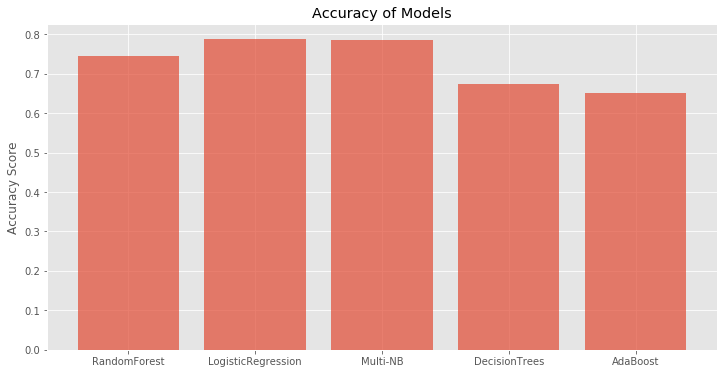

In [57]:
classifiers = ['RandomForest', 'LogisticRegression', 'Multi-NB', 'DecisionTrees', 'AdaBoost']

Y_pos = np.arange(len(classifiers))
Y_val = [ x for x in predictScores]
plt.figure(figsize=(12, 6))
plt.bar(Y_pos,Y_val, align='center', alpha=0.7)
plt.xticks(Y_pos, classifiers)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

 <a id="8"></a> <br>
# 8. Simple neural network classification

I will develop a **LSTM** and **Convolutional Neural Network** model for **Sequence Classification** using the Keras deep learning library. 

Let’s start off by importing the classes and functions required for this model and initializing the random number generator to a constant value (7 for example) to ensure that the results can be reproduced.

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [6]:
# initialize tokenizer
tokenizer = TweetTokenizer(reduce_len=True)

# fix random seed for reproducibility
np.random.seed(7)

In [8]:
top_words = 10000  # We'll keep these many distinct tokens and drop less frequent ones

all_tweets = df.copy()
# Tokenize using the TweetTokenizer
all_tweets.Tweet = all_tweets.Tweet.apply(tokenizer.tokenize)
# Get the word counts
fdist = FreqDist(word for tweet in all_tweets.Tweet for word in tweet)
# Get top top_words terms, in order of frequency
terms = [term for term, count in fdist.most_common(top_words)]
# Replace all tokens with their rank (or 0 if not in the top top_words)
all_tweets.Tweet = all_tweets.Tweet.apply(lambda tweet: [terms.index(term) if term in terms else 0
                                                         for term in tweet])

Then, we get an **80/20** split of *Twitter handles* in the dataset, stratified according to the Party variable so as to have approximately similar proportions of Democrats & Republicans in the training & test sets separately as in the whole dataset. Finally, we split the full dataset into train & test sets based on those *Twitter handles* because we don't want any individual tweeter to appear in both training & test sets.

In [9]:
# Get an 80/20 train/test split of Twitter handles, stratified on Party
tweeters = all_tweets.iloc[:,:2].drop_duplicates()
handles_train, handles_test = train_test_split(tweeters.Handle, stratify=tweeters.Party, test_size=0.2, random_state=0)

# extract train & test sets from the all_tweets df
train = all_tweets[all_tweets.Handle.isin(handles_train)].reset_index().drop('index', axis=1)
test = all_tweets[all_tweets.Handle.isin(handles_test)].reset_index().drop('index', axis=1)

In [10]:
# The purpose of this cell is just to format the data to match the format of keras
X_train = np.array(train.Tweet)
y_train = np.array((train.Party == 'Democrat').astype(int))
X_test = np.array(test.Tweet)
y_test = np.array((test.Party == 'Democrat').astype(int))

Actually, the tweets don't have the same length in terms of words, but same length vectors is required to perform the computation in Keras.

That's, we need to truncate and pad the input tweets so that they are all the same length for modeling. The model will learn that the zero values carry no information.

In [11]:
# truncate and pad input sequences
max_review_length = 50 # The handful tweet are longer than 50 tokens
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

We can now define, compile and fit our LSTM model.
- The first layer is the Embedded layer that uses 32 length vectors to represent each word.
- The next layer is the LSTM layer with 100 memory units (smart neurons).
- Finally, because this is a classification problem we use a Dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 predictions for the two classes (good and bad) in the problem.

We can easily add a one-dimensional CNN and max pooling layers after the Embedding layer which then feed the consolidated features to the LSTM.

In [12]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Asus\Anaconda3\envs\gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
69064/69064 [==============================] - 40s 578us/step - loss: 0.4899 - accuracy: 0.7380
Epoch 2/3
69064/69064 [==============================] - 38s 552us/step - loss: 0.3632 - accuracy: 0.8237
Epoch 3/3
69064/69064 [==============================] - 39s 558us/step - loss: 0.3035 - accuracy: 0.8584
Accuracy: 72.63%


Once fit, we estimate the performance of the model on unseen tweets:

In [ ]:
preds = np.round(model.predict(X_test).ravel())
print('Accuracy: {}'.format(str(round(accuracy_score(y_test, preds), 4))))

### Evaluate by Congressperson

It's not so unusual for a single tweet to be mis-categorized, so perhaps we should consider the overall categorization of each Congressperson's tweets. With this adjustment, we get ~96% accuracy.

In [ ]:
accuracy_df = test.drop(['Tweet'], axis=1)
accuracy_df['preds'] = preds
accuracy_df['Party'] = y_test
correct = 0
total = 0

print("Congresspersons whose tweets were mostly mis-classified:")
for name in accuracy_df.Handle.unique():
    sub_df = accuracy_df[accuracy_df.Handle == name].reset_index()
    sub_preds = sub_df.preds.value_counts()

    if sub_preds.index[0] == sub_df.Party[0]:
        correct += 1
    total += 1

    if sub_preds[sub_df.Party[0]]/len(sub_df) < 0.5:
        print("{} ({}) classified with accuracy: {}".format(name, sub_df.Party[0],
                                                                      str(round(sub_preds[sub_df.Party[0]]/len(sub_df), 4))))

print()
print("Accuracy of the model on a per-Congressperson-basis was: {}".format(str(round(correct/total, 4))))

 <a id="9"></a> <br>
 # 9. Conclusion

Text classification is not only fun, but it’s also a powerful tool for extracting value from unstructured data. It feels like magic when you analyze hundreds of tweets in just a few seconds and automatically get information such as topic, sentiment... 